# Assignment Instructions
## Completing the Assignment  
1. Fill in your STUDENTID (abc123) in the code block below.
2. Fill in any place that says `#YOUR CODE HERE` with python code that implements the indicated function.
3. When filling in `#YOUR CODE HERE` sections, remove or comment out the line  `raise NotImplementedError()`, or else you will lose all credit for that function.
4. Fill in any place that says `YOUR ANSWER HERE` with appropriate markdown text. This usually indicates a manually graded cell.

## Assignment Submission Checklist  
Before you submit this assignment for grading, you must do the following or you risk losing points. 
1. **Remove Extraneous prints** Long prints _might_ confuse the grader. If they do, you lose points.
2. **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart)
3. **Run all cells** (in the menubar, select Cell$\rightarrow$Run All).  
  - If any cell that contains code throws an exception or does not compile, fix it and restart this checklist 
  - If a grading cell throws an exception, you will not recieve any credit for that cell
4. **Save the notebook** This ensures that any graphs or plots are in the submission   
  - Do NOT rename your notebook. It must have the same name that was downloaded, or the grading will fail.  
5. **Zip up the assignment notebook(s) and any files required to run the notebook**
  - You must put your files into a `.zip` file with the same name that was used to download the assignment. For example `ASnn.zip` or `PRnn.zip` where nn is a two digit, zero padded number.
  - All files must be in the root of the zip file, NOT in a subdirectory

By submitting this notebook for grading, you affirm that all work was produced by the author identified below, and that references are included for all use of public source material (to include code, data, diagrams, pictures, and verbatim text).

In [1]:
STUDENTID = "tfs436"

---

# AS05: Exploring Text Data with NLTK
**Version:**  1.1  
**Total Points:** 5

## Objective
The objective of this assignment is to gain experience with the basic NLTK tools for processing text data and use them to develop a vocabulary that would be useful for machine learning tasks. 

## Data Sources

The relevant data sources for this exercise have been copied to the read-only Datasets directory.
The data location is identified by the environment variable DATASETS_ROOT.
The NLTK Corpus is identified by the environment variable NLTK_DATA

## Instructions

Be sure to read the instructions and guidelines provided for each portion of this assignment.  The number of points earned is in parenthesis next to the description in the table of contents below. All of the public tests will use the text _Tale of Two Cities_. The hidden tests use a different Project Gutenberg book, so you will want to test your functions on other texts as well.

[Setup](#Setup) 

[Exercise 1](#Exercise-1)  (0.5) Reading and cleaning the text  
[Exercise 2](#Exercise-2)  (0.5) Initial word tokenization  
[Exercise 3](#Exercise-3)  (0.5) Examining the tokens  
[Exercise 4](#Exercise-4)  (0.5) Removing stop words   
[Exercise 5](#Exercise-5)  (0.5) Finding important words   
[Exercise 6](#Exercise-6)  (0.5) Stemming   
[Exercise 7](#Exercise-7)  (0.5) Bigrams  
[Exercise 8](#Exercise-8)  (0.5) Part of Speech Tagging  
[Exercise 9](#Exercise-9)  (0.5) Spelling recommender 1  
[Exercise 10](#Exercise-10) (0.5) Spelling recommender 2 


### Setup
You will need to run this section each time you start this notebook. 

In [2]:
# Imports and globals for this exercise
# mainline tools
import os
import re
import string
# data tools
import pandas as pd
import numpy as np
# visualization tools
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
# text tools
import nltk
from sklearn.feature_extraction import text

%matplotlib notebook

# Set paths to directories for the data
dataroot = os.environ['DATASETS_ROOT']


# We will be using Charles Dickens book, "A Tale of Two Cities"
# This is Project Gutenburg text 98-0.txt

### Exercise 1
**(0.5 pts)**  
#### Reading and cleaning the text 
In this function, we will read in the raw Project Gutenberg (PG) text file and clean it up a little so that the subsequent analysis processes just the text, not the material added by PG at the beginning and the end of the file.

If you look through several of the texts, you will see that almost all of them have a line of text near the beginning that looks like one of these:    
- `*** START OF THIS PROJECT GUTENBERG EBOOK BOOKTITLE ***`
- `*** START OF THE PROJECT GUTENBERG EBOOK BOOKTITLE ***`.  

There will be some additional text, then the title of the book, indicating the actual start. However, the format for the first occurrance of the title varies widely. You need to find the title line AFTER the `START` line, and use that as the beginning of the book.

Towards the end of the book, you will find one of these strings:  
- `*** END OF THIS PROJECT GUTENBERG EBOOK BOOKTITLE ***`  
- `*** END OF THE PROJECT GUTENBERG EBOOK BOOKTITLE ***`   
Just before that string, you may see another line that starts:  
- `End of the Project Gutenberg EBook`

In the `gbt_clean_gutenburg_text` function, 
- Read in the book given the file name. Remember to set the encoding properly.
- Find the title of the book using a regular expression that will catch either of the `START` lines
- Find the subsequent title line using a regular expression that ignores case and extraneous punctuation.
- Strip everything prior to the title line.
- Locate the line marking the end of the text, whichever form is first.
- Strip everything after and including the `END` or `End` line.
- strip all whitespace at the beginning and end of the resulting string. 

[Instructions](#Instructions)

In [3]:
def gbt_clean_gutenburg_text( sFileName ):
    '''
    Read a Project Gutenberg text and remove extraneous material from the
    beginning and end.
    '''
    textbook_path = os.path.join(dataroot, 'ProjectGutenberg',sFileName)
    if os.path.exists(textbook_path):
        titlestr = re.compile("Title", re.IGNORECASE)
        with open (textbook_path, 'rt',encoding="utf-8") as myfile:
            for line in myfile:
                line = line.rstrip("\n")
                m = re.search(titlestr,line)
                if  m!= None:
                    line = line.split(":")
                    if(line[-1].split(";")):
                        line2 = line[-1].split(";")
                        title = line2[0]
                    else:
                        title = line[-1]
                    break
            title = title.lower()
            mat = re.search(r'START OF (THIS|THE) PROJECT GUTENBERG (.*)END OF (THIS|THE) PROJECT GUTENBERG ', myfile.read(),re.DOTALL)
            text = mat.group(0).split("\n")
            flag = 0
            out = ''
            count = 0
            for txt in text:
                if flag == 1:
                    tmp = re.search(r'END OF (THIS |THE )*PROJECT GUTENBERG',txt, re.IGNORECASE)
                    if tmp is not None:
                        break
                    out +=txt + '\n'
                my_new_string = re.sub('[^a-zA-Z0-9 \n\.]', ' ', txt.lower())
                if my_new_string.find(title.strip()) != -1:
                    count+=1
                    if count ==2:
                        out+=txt + '\n'
                        flag = 1
            return out.strip()
                
    else:
        raise ValueError('File not found: {}'.format(sFileName))


In [4]:
## This is an automatically graded test cell.
# It contains public tests that you can use to help determine whether your
# functions are correct. It also contains hidden tests that are run by
# the autograder.

# Public tests
# ---------------------------------------------------------
# We will be using Charles Dickens book, "A Tale of Two Cities"
# This is Project Gutenburg file: 98-0.txt
sTOTCBook = gbt_clean_gutenburg_text('98-0.txt')
assert 'A TALE OF TWO CITIES' == sTOTCBook[:20]
assert 'I have ever known.”' == sTOTCBook[-19:]
sPaPFile = 'pg42671.txt'
sPaPBook = gbt_clean_gutenburg_text(sPaPFile)
assert 691251 == len(sPaPBook)
sTriFile = 'pg20782.txt'
sTriBook = gbt_clean_gutenburg_text(sTriFile)
assert 337971 == len(sTriBook)


### Exercise 2
**(0.5 pts)**  
#### Initial Word Tokenization
In this function, we want to create a relatively clean token list that does not include punctuation.
- use the nltk word tokenizer to break up the text into tokens
- remove the tokens that are just punctuation. (see string.punctuation).
- The standard string punctuation does not include the extended open and close double quotes (`“ ”`), so you will need to add them to the punctuation list.
- turn all of the tokens into lower case.
- return the list of tokens.

[Instructions](#Instructions)

In [5]:
def gbt_tokenize_nopunct( sRawBook ):
    '''
    Initial tokenization of a Gutenberg text.
    Returns a list of tokens, lower case, with punctuation tokens removed.
    '''
    tokens = nltk.word_tokenize(sRawBook)
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    remove = string.punctuation+'“'+'”'
    remove = list(remove)
    #table = str.maketrans('', '', remove)
    #stripped = [w.translate(table) for w in tokens]
    words = [word for word in tokens if word not in remove]
    return words

In [6]:
## This is an automatically graded test cell.
# It contains public tests that you can use to help determine whether your
# functions are correct. It also contains hidden tests that are run by
# the autograder.

# Public tests
# ---------------------------------------------------------
tokTOTC = gbt_tokenize_nopunct( sTOTCBook )

assert 138144 == len(tokTOTC)


### Exercise 3
**(0.5 pts)**  
#### Examining the tokens
There are too many tokens to manually examine the list. We need some way of summarizing the tokens. The next function must return a tuple with various summary information bits in this order:
- number of unique tokens
- the lexical diversity (ratio of unique tokens to the total number of tokens)
- a dictionary of the 10 most frequently appearing tokens ({token:count}).
- a list of all the words that are only used once, sorted alphabetically.

[Instructions](#Instructions)

In [7]:
def gbt_token_summarize( tok ):
    frequency = nltk.FreqDist(tok)
    uUnique = frequency.B()
    lexDiv = frequency.B()/frequency.N()
    dctMost = dict(frequency.most_common(10))
    lstLeast = sorted(frequency.hapaxes())
    return (uUnique,lexDiv,dctMost,lstLeast)

In [8]:
## This is an automatically graded test cell.
# It contains public tests that you can use to help determine whether your
# functions are correct. It also contains hidden tests that are run by
# the autograder.

# Public tests
# ---------------------------------------------------------
nUnique, lexDiv, dctMost, lstLeast = gbt_token_summarize( tokTOTC )
assert 10640 == nUnique
assert 8050 == dctMost['the']
assert 4979 == dctMost['and']
np.testing.assert_almost_equal(lexDiv, 0.077, decimal=3, err_msg='Incorrect lexical diversity', verbose=True)


### Exercise 4
**(0.5 pts)**  
#### Removing Stop Words
Many of the most frequent words in the text have very little semantic value. This next function removes stopwords from the list of tokens. 
- Create a union of the stopwords from both NLTK and Scikit-learn.
- The standard stopwords don't include a few obvious items such as quotes that appear twice in a row, and the apostrophe s that was tokenized from plural words. To correct this, add the following list of items to the stopwords: `["''", '``', '--', "'s"]`
- return the filtered list of tokens. The order of the remaining tokens must remain unchanged from the order in which they appear in the text.

[Instructions](#Instructions)

In [9]:
from nltk.corpus import stopwords as sw1
from sklearn.feature_extraction import text 
stop_words = sw1.words('english') + ["''", '``', '--', "'s"]
stop_words = text.ENGLISH_STOP_WORDS.union(stop_words)
def gbt_remove_stopwords(tok):
    words = [w for w in tok if not w in stop_words]
    return words

In [10]:
## This is an automatically graded test cell.
# It contains public tests that you can use to help determine whether your
# functions are correct. It also contains hidden tests that are run by
# the autograder.

# Public tests
# ---------------------------------------------------------
tokcleanTOTC = gbt_remove_stopwords(tokTOTC)

assert 56027 == len(tokcleanTOTC)
# Note that we have reduced the vocabulary from 138144 tokens to 56027 tokens
# while hopefully maintaining the information content.

nUnique, lexDiv, dctMost, lstLeast = gbt_token_summarize( tokcleanTOTC )
assert 10340 == nUnique
assert 359 == dctMost['lorry']
assert 297 == dctMost['defarge']
np.testing.assert_almost_equal(lexDiv, 0.184, decimal=3, err_msg='Incorrect lexical diversity', verbose=True)
assert sorted(lstLeast[0:5]) == sorted(["'and", "'at", "'barsad", "'bring", "'but"])




### Exercise 5
**(0.5 pts)**  
#### Finding important words  
The vocabulary is still too large for a human to quickly peruse. We need another tool to examine frequently occurring words that are non-trivial. We'll use the word length as an analogue for triviality.
- the following function requires the clean token list, a minimum word length, and a minimum frequency of occurrance.
- the function must return a pandas series named `Frequency` with index named `Words`
- the order of the entries in the series must be descending by `Frequency`, then alphabetical by index when the Frequency is the same
- if the fourth parameter is set to `True`, then the function must also plot the frequency distribution of the returned list.


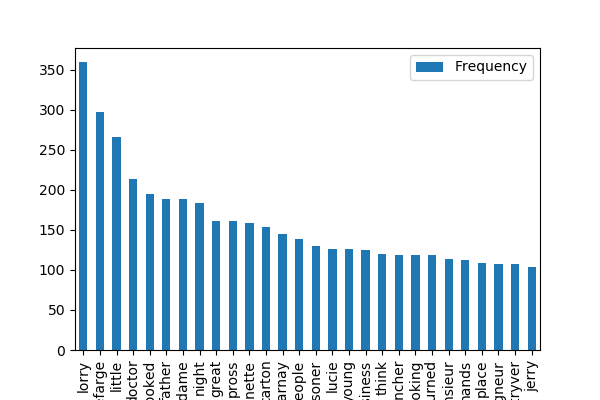  

The above is the plot for _Tale of Two Cities_ with minLength = 5 and minFreq = 100.

[Instructions](#Instructions)

In [11]:
def gbt_find_important_words( tok, minLength, minFreq, bPlot=False ):
    freq = nltk.FreqDist(tok)
    all = freq.most_common()
    all = [(word,length) for word,length in all if len(word) >= minLength and length >= minFreq ]
    df = pd.DataFrame(all,columns = ['Words','Frequency'])
    df.sort_values(by=['Frequency','Words'], ascending=False,inplace = True)
    df.set_index('Words',inplace = True)
    if bPlot == True:
        df.plot.bar(figsize = (8,4))
    return (df['Frequency'])

In [12]:
## This is an automatically graded test cell.
# It contains public tests that you can use to help determine whether your
# functions are correct. It also contains hidden tests that are run by
# the autograder.

# Public tests
# ---------------------------------------------------------
srImpWordsTOTC = gbt_find_important_words(tokcleanTOTC, 6, 100)
assert srImpWordsTOTC.index[0] == 'defarge'
assert srImpWordsTOTC.index[-5] == 'looking'


In the cell below, call gbt_find_important_words with minLength of 5, minFreq of 100, and bPlot being True so that it will produce a bargraph. Capture the output so that all you see is the bar graph.

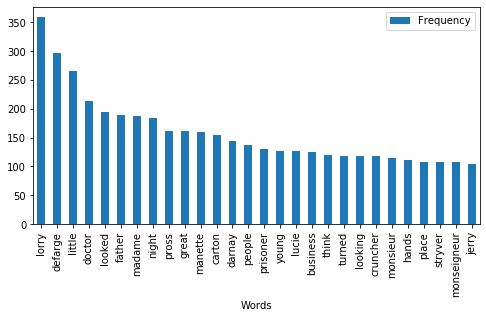

In [13]:
# Plot the TOTC important words for minLength = 5 and minFreq = 100
# Don't print the list
srImpWordsTOTC_5 = gbt_find_important_words(tokcleanTOTC, 5, 100,True)

### Exercise 6
**(0.5 pts)**  
#### Stemming
Use the NLTK Snowball stemmer in the function below. 
- The function must return a list of stemmed tokens. 
- Note that many of these are no longer proper words.
In your own cells (please delete or comment out before submitting) you might want to compare the list of words that only appear once in the cleaned text versus the subsequently stemmed text.

[Instructions](#Instructions)

In [14]:
from nltk.stem.snowball import SnowballStemmer
def gbt_stem_words(tok):
    snowball = SnowballStemmer('english')
    stemmed = [snowball.stem(word) for word in tok ]
    return (stemmed)


In [15]:
## This is an automatically graded test cell.
# It contains public tests that you can use to help determine whether your
# functions are correct. It also contains hidden tests that are run by
# the autograder.

# Public tests
# ---------------------------------------------------------
tokstTOTC=gbt_stem_words(tokcleanTOTC)
nUnique, lexDiv, dctMost, lstLeast = gbt_token_summarize(tokstTOTC)
assert 6916 == nUnique
np.testing.assert_almost_equal(lexDiv, 0.123, decimal=3, err_msg='Incorrect lexical diversity', verbose=True)
assert dctMost['lorri'] == 363
assert sorted(lstLeast[0:5]) == sorted(['1757', '1792', '21', '_am_', '_are_'])

              

### Exercise 7 
**(0.5 pts)**  
#### Bigrams
Sometime sequences of words are important. Bigrams - two consecutive words, and Trigrams - three consecutive words, are the most frequently encountered. Not all bigrams are necessarily important. One way to determine importance is to include a scoring function. A commonly used one is: 

$$score(w_i,w_j) = \frac{count(w_i,w_j)}{count(w_i)*count(w_j)}$$

Where $\delta$ is the cutoff threshold. 

The following function finds important bigrams that are candidates for expanding the vocabulary. 
- The input will be the raw list of tokens BEFORE removing punctuation and changing case (why is this better?).
- Only include bigrams that 
  - appear more than once in the text
  - score at or above the threshold
  - only contain alpha characters.
- The return must be a dictionary where the key is the bigram (as a tuple), and the value is the score.

[Instructions](#Instructions)

In [16]:
def gbt_bigrams( tok, delta ):
    bigrm = list(nltk.bigrams(tok))
    freq = nltk.FreqDist(tok)
    total = freq.N()
    freq_bigrm = nltk.FreqDist(bigrm)
    total_bigram = freq_bigrm.N()
    final_bigram = {}
    for grm in bigrm:
        if grm[0].isalpha() & grm[1].isalpha():
            grm1 = round(freq.freq(grm[0])*total)
            grm2 = round(freq.freq(grm[1])*total)
            grm_bi = round(freq_bigrm.freq(grm)*total_bigram)
            if (grm_bi>1):
                score = grm_bi/(grm1*grm2)
                if(score>=delta):
                    final_bigram.update({grm:score})
    return (final_bigram)

In [17]:
## This is an automatically graded test cell.
# It contains public tests that you can use to help determine whether your
# functions are correct. It also contains hidden tests that are run by
# the autograder.

# Public tests
# ---------------------------------------------------------
dctBgTOTC = gbt_bigrams( nltk.word_tokenize(sTOTCBook), .3 )
assert isinstance(dctBgTOTC, dict)
assert 17 == len(dctBgTOTC)
np.testing.assert_almost_equal(dctBgTOTC[('Notre', 'Dame')], 0.5, decimal=1, err_msg='Incorrect score', verbose=True)
np.testing.assert_almost_equal(dctBgTOTC[('indignant', 'refugee')], 0.33, decimal=2, err_msg='Incorrect score', verbose=True)


### Exercise 8
**(0.5 pts)**  
#### Part of Speech Tagging
Once again for part of speech tagging, we'll use the raw list of tokens BEFORE removing punctuation and changing case 
This function will find the most frequently used parts of speech.
- The input is the tokenized text after initial cleaning but before removing punctuation and changing case
- The second parameter is the number of parts of speech to return
- The return is a list of tuples of the form (part_of_speech, frequency) sorted in descending order of frequency.

[Instructions](#Instructions)


In [18]:
#nltk.download('averaged_perceptron_tagger')
def gbt_pos_tag( tok, nFreq ):
    pos = nltk.pos_tag(tok)
    pos = [l for _,l in pos]
    freq_pos = nltk.FreqDist(pos)
    total_pos = freq_pos.N()
    final_pos = {}
    for posi in freq_pos:
        pos_c = round(freq_pos.freq(posi)*total_pos)
        final_pos.update({posi:pos_c})
    s = [(k, final_pos[k]) for k in sorted(final_pos, key=final_pos.get, reverse=True)]
    return (s[0:nFreq])
    


In [19]:
## This is an automatically graded test cell.
# It contains public tests that you can use to help determine whether your
# functions are correct. It also contains hidden tests that are run by
# the autograder.

# Public tests
# ---------------------------------------------------------
posTOTC = gbt_pos_tag( nltk.word_tokenize(sTOTCBook), 6 )
assert 'NN' == posTOTC[0][0]
assert 21066 == posTOTC[0][1]
assert ',' == posTOTC[3][0]
assert 13126 == posTOTC[3][1]
posTOTC

[('NN', 21066),
 ('IN', 18223),
 ('DT', 14332),
 (',', 13126),
 ('PRP', 11030),
 ('JJ', 9734)]

### Exercise 9
**(0.5 pts)**  
#### Spelling Recommender 1

The purpose of this function is to recommend corrections for misspelled words. Note that the corpus of correct spellings is in the variable `correct_spellings`. For this first recommender,
- The input is a list of words, some of which are misspelled.
- For each word, find the **[Jaccard distance](https://en.wikipedia.org/wiki/Jaccard_index)** on the **trigrams** of the two words. Return as your recommendation the correct word with the shortest distance from the misspelled word.
- The return is a list of recommended correct words. If a word is not misspelled, just return the same word.


In [20]:
# You will need these
from nltk.corpus import words
correct_spellings = words.words()

In [25]:
from nltk.metrics.distance import jaccard_distance
from nltk.util import ngrams

def spell_recommender_jac3( lst ):
    final = []
    for word in lst:
        out = {}
        words = [w for w in correct_spellings if w[0] == word[0]]
        for x in words:
            ed = jaccard_distance(set(nltk.trigrams(word)), set(nltk.trigrams(x)))
            out.update({x:ed})
        s = [[k, out[k]] for k in sorted(out, key=out.get)]
        #for key,value in s[0]:
        final.extend([s[0][0]])
    return( final)

In [26]:
## This is an automatically graded test cell.
# It contains public tests that you can use to help determine whether your
# functions are correct. It also contains hidden tests that are run by
# the autograder.

# Public tests
# ---------------------------------------------------------
rec = spell_recommender_jac3(['indolent', 'cormulent', 'incendenece', 'validrate'])
assert sorted(rec) == sorted(['indolent', 'corpulent', 'indecence', 'validate'])

### Exercise 10
**(0.5 pts)**  
#### Spelling Recommender 2
This function also recommends corrections for misspelled words. Note that the corpus of correct spellings is in the variable `correct_spellings`. For this first recommender,
- The input is a list of words, some of which are misspelled.
- For each word, find the **[Edit distance on the two words with transpositions.](https://en.wikipedia.org/wiki/Damerau%E2%80%93Levenshtein_distance)**. Return as your recommendation the correct word with the shortest distance from the misspelled word.
- The return is a list of recommended correct words. If a word is not misspelled, just return the same word.


In [27]:
from nltk.metrics.distance import edit_distance
def spell_recommender_editdist( lst ):
    final = []
    for word in lst:
        out = {}
        words = [w for w in correct_spellings if w[0] == word[0]]
        for x in words:
            ed = edit_distance(word, x,transpositions=True)
            out.update({x:ed})
        s = [[k, out[k]] for k in sorted(out, key=out.get)]
        #for key,value in s[0]:
        final.extend([s[0][0]])
    return( final)

In [28]:
## This is an automatically graded test cell.
# It contains public tests that you can use to help determine whether your
# functions are correct. It also contains hidden tests that are run by
# the autograder.

# Public tests
# ---------------------------------------------------------

rec = spell_recommender_editdist(['indolent', 'cormulent', 'incendenece', 'validrate'])
assert sorted(rec) == sorted(['indolent', 'corpulent', 'intendence', 'validate'])